In [66]:
import pandas as pd
import numpy as np
import matplotlib as mt
import seaborn as sb
import sklearn as sk

In [67]:
Df=pd.read_csv('CASEN_2017.csv', sep=';', encoding='latin-1', on_bad_lines='skip')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,26,51,60,62,77,93,96,97,99,109,117,136,137,138,151,152,153,154,156,157,158,159,160,161,162,163,164,165,167,168,169,170,172,173,174,175,176,177,178,179,180,181,182,183,185,186,187,188,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,212,235,240,252,255,257,272,273,274,275,276,278,279,280,281,282,283,285,286,289,290,291,292,293,294,295,305,307,310,323,336,337,353,357,365,404,405,412,470,506,509,510,512,514,517,518,522,528,529,531,532,533,534,536) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [68]:
Data=Df[['y1', 'y2_dias', 'sexo', 'y2_hrs', 'edad', 'ch1']]

### Observando parte de los datos

In [69]:
Data.head()

,y1,y2_dias,sexo,y2_hrs,edad,ch1
0,NaN,NaN,Mujer,NaN,56,Patrón o empleador/ Trabajador Cuenta Propia
1,200000,30,Mujer,216,21,Asalariado
2,270000,30,Hombre,192,24,Asalariado
3,300000,30,Hombre,192,28,Asalariado
4,320000,30,Hombre,192,26,Asalariado


### Ubicando cantidad de valores nulos

In [70]:
Data.isna().sum()

y1         49838
y2_dias    49838
sexo           0
y2_hrs     49838
edad           0
ch1            0
dtype: int64

### Ubicando y eliminando duplicados

In [71]:
Data.duplicated().sum()
Data=Data.drop_duplicates()

### Reemplazando los valores nulos

In [72]:
Data[['y1','y2_dias','y2_hrs']]=Data[['y1','y2_dias','y2_hrs']].fillna(0)

### Transformando la variable sexo en dummie

In [73]:
dummies = pd.get_dummies(Data['sexo'], drop_first = True)

In [74]:
Data = pd.concat([Data, dummies], axis = 1) 
Data = Data.drop(columns=['sexo' ])

In [75]:
Data[['y1', 'y2_hrs', 'y2_dias', 'edad']]=Data[['y1', 'y2_hrs', 'y2_dias', 'edad']].apply(pd.to_numeric, errors='coerce')

### Elaborando boxplot para visualizar valores atipicos

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


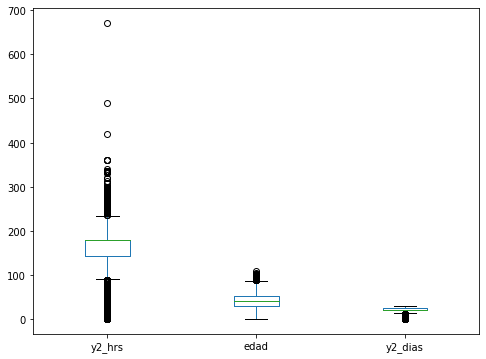

In [76]:
Data.boxplot(column=['y2_hrs', 'edad', 'y2_dias'], figsize=(8,6), grid=False)

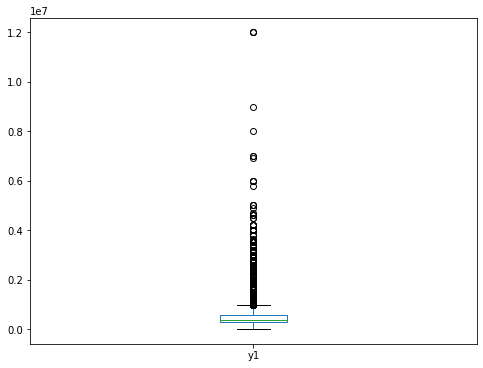

In [77]:
Data.boxplot(column=['y1'], figsize=(8,6), grid=False)

### Tratando y transformando los valores atipicos que pudiesen desajustar el modelo

In [105]:
P90_y2=Data[['y2_hrs']].quantile(0.9)
P90_y2

y2_hrs    180.0
Name: 0.9, dtype: float64

In [101]:
Data[Data['y2_hrs']>180.0]=180.0

In [99]:
P90_edad=Data[['edad']].quantile(0.9)
P90_edad

edad    94.2
Name: 0.9, dtype: float64

In [102]:
Data[Data['edad']>94.2]=94.2

In [103]:
P10_dias=Data[['y2_dias']].quantile(0.1)
P10_dias

y2_dias    14.0
Name: 0.1, dtype: float64

In [104]:
Data[Data['y2_dias']<14.0]=14.0

### Un poco de Estadistica descriptiva

In [83]:
Data.describe()

,y1,y2_dias,y2_hrs,edad,Mujer
count,1.801200e+04,18353.000000,17955.000000,18921.000000,18921.000000
mean,3.751076e+05,35.375873,136.437171,51.604270,17.981787
std,4.622141e+05,29.373959,48.699312,24.093496,36.549879
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,9.000000e+04,20.000000,94.200000,32.000000,0.000000
50%,2.800000e+05,24.000000,160.000000,46.000000,1.000000
75%,4.800000e+05,30.000000,180.000000,63.000000,1.000000
max,1.200000e+07,94.200000,187.000000,94.200000,94.200000


In [106]:
Data = Data.dropna()

### Seleccionando variables, particionando el conjunto para crear los modelos de regresion simple y multiple

In [107]:
X=Data['y2_hrs'] 
Y=Data['y1']

In [108]:
X = X.to_numpy().reshape((-1, 1))

In [109]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.15, random_state=36) 

In [110]:
from sklearn.linear_model import LinearRegression 
modelo=LinearRegression()

In [111]:
modelo.fit(X_train, Y_train) 
r_sq=modelo.score(X_train, Y_train) 
print("coeficiente de determinacion:{}".format(r_sq)) 
print("interceptor:{}".format(modelo.intercept_)) 
print("inclinacion:{}".format(modelo.coef_))

coeficiente de determinacion:0.1602085512666237
interceptor:-98153.9878404797
inclinacion:[3415.92626821]


### Solo 16% del ingreso es explicado por las horas trabajadas. Es necesario considerar mas variables para obtener un mejor ajuste del modelo lineal.

In [ ]:
### Realizando predicciones del modelo lineal simple
y_pred = modelo.intercept_ + modelo.coef_ * X_test 
print("respuesta de la prediccion:\n {}".format(y_pred))

### Evaluando multicolinealidad entre las variables explicativas

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X2 = Data[['y2_hrs', 'y2_dias', 'edad']]

In [132]:
vif_Data = pd.DataFrame()
vif_Data["factores"] = X2.columns
  
# calculando VIF
vif_Data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]
  
print(vif_Data)

  factores        VIF
0   y2_hrs   4.004604
1  y2_dias  13.047521
2     edad  21.167792


### las variables y2_dias y edad ocasionan graves problemas de multicolinealidad al modelo, por ende se eliminaran del mismo.

In [134]:
X2 = Data[['y2_hrs',  'Mujer']] 
Y2 = Data['y1']

In [135]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=0)

In [136]:
multiple=LinearRegression()

In [137]:
multiple.fit(X2_train, Y2_train)

LinearRegression()

In [138]:
r2 = multiple.score(X2_train, Y2_train)
print("coeficiente de determinación : {} ".format(r2))

coeficiente de determinación : 0.23759936170494078 


### Aproximadamente un 25% de los ingresos es explicado por los dias, horas, la edad y genero de los trabajadores. Es posible que se requieran estudiar mas variables o que se pudiese probar con un modelo con mejor ajuste a los datos.

In [139]:
print("interceptor: {} ".format(multiple.intercept_))
print("inclinacion: {} ".format(multiple.coef_))

interceptor: 131527.6931384502 
inclinacion: [ 2300.3609349  -3772.13149761] 


In [140]:
y2_pred = multiple.intercept_ + multiple.coef_ * X2_test
print("respuesta de la prediccion:\n {}".format(y2_pred))

respuesta de la prediccion:
               y2_hrs          Mujer
21881  430574.614675  131527.693138
148    163732.746227   78717.852172
47377  453578.224024  127755.561641
188    163732.746227   78717.852172
12685  517988.330201  131527.693138
...              ...            ...
30572  348221.693206 -223807.093937
44952  545592.661420  127755.561641
40989  163732.746227   78717.852172
72020  361563.786628  127755.561641
16367  269549.349232  131527.693138

[3411 rows x 2 columns]
